# Jupyter 绘图

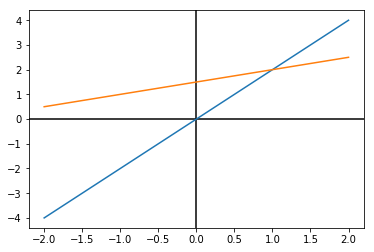

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

x = [-2, 2, -2, 2]
y = [-4, 4, 0.5, 2.5]

fig = plt.figure()
plt.axhline(y=0, c='black')
plt.axvline(x=0, c='black')

plt.plot(x[:2], y[:2], x[2:], y[2:])

plt.draw()


In [14]:
plt.close(fig)

# Jupyter 绘制公式

### 写在一行:
`$\begin{cases} x&+2y&+z&=2\\ 3x&+8y&+z&=12\\ &4y&+z&=2 \end{cases}$ `

### 分几行写:
`$\begin{cases}
x&+2y&+z&=2 \\ 
3x&+8y&+z&=12 \\ 
&4y&+z&=2
\end{cases}$`

### 效果:
$\begin{cases}
x&+2y&+z&=2 \\ 
3x&+8y&+z&=12 \\ 
&4y&+z&=2
\end{cases}$

# Draw 2D vectors

<type 'int'>
[0 1 2 3 4]
[5 6 7 8 9]
[10 11 12 13 14]
[15 16 17 18 19]
[20 21 22 23 24]
0
1
2
3
r
line : 
 [-5 -4 -3 -2 -1  0  1  2  3  4  5]


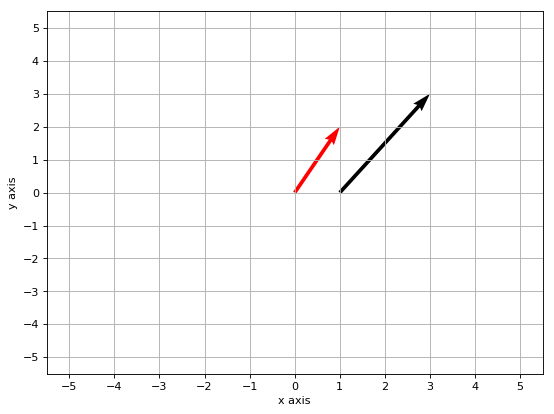

In [1]:
%matplotlib inline

# from now on, I will arrange the vector of 2D

import numpy as np
import matplotlib.pyplot as plt

# if you want to make vec in here, change the following variables 

# set np.linspace function 

lineSizePositive = 5
lineSizeNegative = -5
numberOfSampleOfLine = lineSizePositive * 2 + 1

# choose one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'} as vector color
# 'b' : blue, 'g' : green, 'r' : red, 'c' : cyan,
# 'm' : meganta, 'y':yellow, 'k' : black, 'w' : whilte from https://matplotlib.org/api/colors_api.html

vectors  = {"StartingPointOfX" : 0,"StartingPointOfY" : 0,
            "SizeOfXvector" : 1,"StartingPointOfYvector" : 2,
            "VectorColor" : "r"}
vectors2 = {"StartingPointOfX" : 1,"StartingPointOfY" : 0,
            "SizeOfXvector" : 2,"StartingPointOfYvector" : 3,
            "VectorColor" : "k"}

vectorList = [vectors, vectors2]

# if you want to make it better, just use array
# you might need the function meshgrid
# But In my case, just this function for linear algebra. I think I couldn't need it.
x = np.arange(25).reshape(5,5)

a = np.array([0,1,2,3, 'r'])

print (type(34))
for i in x :
     print (i)

for i in a :
     print (i)


#for vec in vectorList :
#    print (vec["StartingPointOfX"]);

def PlotVector(legend=True) :
    # Create a figure of size 8x6 inches, 80 dots per inch
    fig = plt.figure(figsize=(8, 6), dpi=80)
    
    # for the origin
    #ax = fig.gca()
    #ax.scatter([0],[0],color="k",s=100)
    
    # line size of each axes 
    line = np.linspace(lineSizeNegative, lineSizePositive, numberOfSampleOfLine, endpoint=True, dtype="int")

    # print varialble line
    print ("line : \n {0}".format(line))

    # Set x limits, * 1.1 just express more space for drawing
    xlim = plt.xlim(line.min() * 1.1, line.max() * 1.1)

    # print varialble line
    #print ("xlim : \n {0}".format(xlim))

    # Set x ticks
    xticks = plt.xticks(line)

    # print varialble line
    #print ("xticks : \n {0}".format(xticks))

    # Set x limits, * 1.1 just express more space for drawing
    ylim = plt.ylim(line.min() * 1.1, line.max() * 1.1)

    # print varialble line
    #rint ("ylim : \n {0}".format(ylim))

    # Set x ticks
    yticks = plt.yticks(line)

    # print varialble line
    #rint ("yticks : \n {0}".format(yticks))

    # set label name of x axis
    plt.xlabel("x axis")

    # set label name of y axis
    plt.ylabel("y axis")

    # set grid of coordinate to True
    plt.grid(linestyle = "-")

    # choose one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'} as vector color
    # 'b' : blue, 'g' : green, 'r' : red, 'c' : cyan,
    # 'm' : meganta, 'y':yellow, 'k' : black, 'w' : whilte from https://matplotlib.org/api/colors_api.html
    
    for vec in vectorList :
        vecs = plt.quiver(vec["StartingPointOfX"], vec["StartingPointOfY"], vec["SizeOfXvector"], vec["StartingPointOfYvector"]
                  , angles="xy", scale_units="xy",scale=1, color=vec["VectorColor"]) 
        #if (legend) :
            #plt.legend(["The origin",r'$\vec a$',"test 2"])

    plt.show()

    
    
PlotVector()   

# Draw 3D vectors

In [4]:
from matplotlib import pyplot as plt
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
import numpy as np

conv2Rad = lambda x : x*np.pi/180

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

def drawVector(fig, pointA, pointB, **kwargs):
	ms = kwargs.get('mutation_scale', 20)
	ars = kwargs.get('arrowstyle', '-|>')
	lc = kwargs.get('lineColor', 'k')
	pc = kwargs.get('projColor', 'k')
	pointEnable = kwargs.get('pointEnable', True)
	projOn = kwargs.get('proj', True)

	if pointA.size == 3:
		xs = [pointA[0], pointB[0]]
		ys = [pointA[1], pointB[1]]
		zs = [pointA[2], pointB[2]]
	else:
		xs = [pointA[0,3], pointB[0,3]]
		ys = [pointA[1,3], pointB[1,3]]
		zs = [pointA[2,3], pointB[2,3]]

	out = Arrow3D(xs, ys, zs, mutation_scale=ms, arrowstyle=ars, color=lc)
	fig.add_artist(out)

	if pointEnable: fig.scatter(xs[1], ys[1], zs[1], color='k', s=50)
	if projOn==True:
		fig.plot(xs, ys, [0, 0], color=pc, linestyle='--')
		fig.plot([xs[0], xs[0]], [ys[0], ys[0]], [0, zs[0]], color=pc, linestyle='--')
		fig.plot([xs[1], xs[1]], [ys[1], ys[1]], [0, zs[1]], color=pc, linestyle='--')
		
def drawPointWithAxis(fig, *args, **kwargs):
	ms = kwargs.get('mutation_scale', 20)
	ars = kwargs.get('arrowstyle', '->')
	pointEnable = kwargs.get('pointEnable', True)
	axisEnable = kwargs.get('axisEnable', True)

	if len(args) == 4:
		ORG = args[0]
		hat_X = args[1]
		hat_Y = args[2]
		hat_Z = args[3]
		xs_n = [ORG[0], ORG[0] + hat_X[0]]
		ys_n = [ORG[1], ORG[1] + hat_X[1]]
		zs_n = [ORG[2], ORG[2] + hat_X[2]]
		xs_o = [ORG[0], ORG[0] + hat_Y[0]]
		ys_o = [ORG[1], ORG[1] + hat_Y[1]]
		zs_o = [ORG[2], ORG[2] + hat_Y[2]]
		xs_a = [ORG[0], ORG[0] + hat_Z[0]]
		ys_a = [ORG[1], ORG[1] + hat_Z[1]]
		zs_a = [ORG[2], ORG[2] + hat_Z[2]]
	else:
		tmp = args[0]
		ORG = tmp[:3,3:]
		hat_X = tmp[:3,0:1]
		hat_Y = tmp[:3,1:2]
		hat_Z = tmp[:3,2:3]
		xs_n = [ORG[0, 0], ORG[0, 0] + hat_X[0, 0]]
		ys_n = [ORG[1, 0], ORG[1, 0] + hat_X[1, 0]]
		zs_n = [ORG[2, 0], ORG[2, 0] + hat_X[2, 0]]
		xs_o = [ORG[0, 0], ORG[0, 0] + hat_Y[0, 0]]
		ys_o = [ORG[1, 0], ORG[1, 0] + hat_Y[1, 0]]
		zs_o = [ORG[2, 0], ORG[2, 0] + hat_Y[2, 0]]
		xs_a = [ORG[0, 0], ORG[0, 0] + hat_Z[0, 0]]
		ys_a = [ORG[1, 0], ORG[1, 0] + hat_Z[1, 0]]
		zs_a = [ORG[2, 0], ORG[2, 0] + hat_Z[2, 0]]

	if pointEnable: fig.scatter(xs_n[0], ys_n[0], zs_n[0], color='k', s=50)

	if axisEnable:
		n = Arrow3D(xs_n, ys_n, zs_n, mutation_scale=ms, arrowstyle=ars, color='r')
		o = Arrow3D(xs_o, ys_o, zs_o, mutation_scale=ms, arrowstyle=ars, color='g')
		a = Arrow3D(xs_a, ys_a, zs_a, mutation_scale=ms, arrowstyle=ars, color='b')
		fig.add_artist(n)
		fig.add_artist(o)
		fig.add_artist(a)

def RotX(phi):
    return np.array([[1, 0, 			0],
                     [0, np.cos(phi), 	-np.sin(phi)],
                     [0, np.sin(phi), 	np.cos(phi)]])

def RotY(theta):
    return np.array([[np.cos(theta), 	0, np.sin(theta)],
                     [0, 				1, 0],
                     [-np.sin(theta), 	0, np.cos(theta)]])

def RotZ(psi):
    return np.array([[np.cos(psi), 	-np.sin(psi), 	0],
                     [np.sin(psi), 	np.cos(psi), 	0],
                     [0, 			0, 				1]])

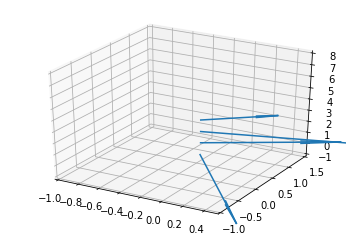

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

soa = np.array([[0, 0, 1, 1, -2, 0], [0, 0, 2, 1, 1, 0],
                [0, 0, 3, 2, 1, 0], [0, 0, 4, 0.5, 0.7, 0]])

X, Y, Z, U, V, W = zip(*soa)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W)
ax.set_xlim([-1, 0.5])
ax.set_ylim([-1, 1.5])
ax.set_zlim([-1, 8])
plt.show()